In [2]:
import io
import csv
import urllib
import urllib.request
import urllib.parse
import os
import pandas as pd
import numpy as np
import json
import geojson
from dotenv import load_dotenv

In [3]:
env_path = '.\\vars.env'
filepath_list = ['374030-wg84.geojson', '273460-wg84.geojson', '374031-wg84.geojson',
                 '374032-wg84.geojson', '376280-wg84.geojson'] 
load_dotenv(env_path)
KEY = os.getenv('KEY')

## Import datasets

In [33]:
metadata = pd.read_csv('streetlight-meta.csv', header=0)
features_df = pd.read_csv('streetlight-data.csv', header=0)
combined_df = pd.read_csv('streetlight-combined.csv', header=0)

In [35]:
metadata.head()

,copyright,date,pano_id,status,view_lat,view_long
0,© Google,2012-08,HVTHF772l8uuo59MkrsIOQ,OK,38.060828,-78.500034
1,© Google,2012-10,UXnoWZ5G9dTV9lCFCGW_-Q,OK,38.037575,-78.494232
2,© Google,2012-08,rxJjsQzFjMJCrN2cAj-sFA,OK,38.034307,-78.488551
3,© Google,2019-07,_lb8eEAV8eHzf2PJ1WkyjQ,OK,38.043803,-78.493220
4,© Google,2018-06,1zX-eSFuGb4b9NtV6ttk1A,OK,38.031178,-78.477203


In [36]:
features_df.head()

,type,geometry.type,geometry.coordinates,properties.SUBTYPECD,properties.GRID_ADDRE,properties.WATTS,properties.FIXTURE_ST,properties.DECAL_COLO,properties.DECAL_NUMB,properties.LAMP_CD,...,properties.PREMISE_ID,properties.ISWATCHLIG,properties.INSPECTION,properties.BASIC_PREM,properties.CUID,properties.PATTERN,properties.COLOR_TEMP,properties.BASE_COLOR,long,lat
0,Feature,Point,"[-78.500067, 38.060712]",1,F2326XN8900,100,ENCL,YLO,10,HPS,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.500067,38.060712
1,Feature,Point,"[-78.494218, 38.037517]",1,G0025DM2000,100,ENCL,YLO,10,HPS,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.494218,38.037517
2,Feature,Point,"[-78.488514, 38.034276]",1,G0025GJ4600,150,ENCL,YLO,15,HPS,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.488514,38.034276
3,Feature,Point,"[-78.49317, 38.04372]",4,G0026DB8400,175,ENCL,LTBL,17,MV,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.493170,38.043720
4,Feature,Point,"[-78.477127, 38.031177]",4,G0025MH9400,250,ENCL,LTBL,25,MV,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.477127,38.031177


In [37]:
combined_df.head()

,type,geometry.type,geometry.coordinates,properties.SUBTYPECD,properties.GRID_ADDRE,properties.WATTS,properties.FIXTURE_ST,properties.DECAL_COLO,properties.DECAL_NUMB,properties.LAMP_CD,...,properties.COLOR_TEMP,properties.BASE_COLOR,long,lat,copyright,date,pano_id,status,view_lat,view_long
0,Feature,Point,"[-78.500067, 38.060712]",1,F2326XN8900,100,ENCL,YLO,10,HPS,...,NaN,NaN,-78.500067,38.060712,© Google,2012-08,HVTHF772l8uuo59MkrsIOQ,OK,38.060828,-78.500034
1,Feature,Point,"[-78.494218, 38.037517]",1,G0025DM2000,100,ENCL,YLO,10,HPS,...,NaN,NaN,-78.494218,38.037517,© Google,2012-10,UXnoWZ5G9dTV9lCFCGW_-Q,OK,38.037575,-78.494232
2,Feature,Point,"[-78.488514, 38.034276]",1,G0025GJ4600,150,ENCL,YLO,15,HPS,...,NaN,NaN,-78.488514,38.034276,© Google,2012-08,rxJjsQzFjMJCrN2cAj-sFA,OK,38.034307,-78.488551
3,Feature,Point,"[-78.49317, 38.04372]",4,G0026DB8400,175,ENCL,LTBL,17,MV,...,NaN,NaN,-78.493170,38.043720,© Google,2019-07,_lb8eEAV8eHzf2PJ1WkyjQ,OK,38.043803,-78.493220
4,Feature,Point,"[-78.477127, 38.031177]",4,G0025MH9400,250,ENCL,LTBL,25,MV,...,NaN,NaN,-78.477127,38.031177,© Google,2018-06,1zX-eSFuGb4b9NtV6ttk1A,OK,38.031178,-78.477203


## Drop some columns
You can add or subtract whatever you want

In [38]:
column_drop = ['type', 'geometry.type', 'properties.SUBTYPECD',
       'properties.WATTS','properties.DECAL_COLO', 
       'properties.DECAL_NUMB', 'properties.LAMP_CD',
       'properties.USE_CD', 'properties.MOUNT_HEIG', 'properties.OWNER',
       'properties.BRACKET_CD', 'properties.BRACKET_LN',
       'properties.INSTALL_DA', 'properties.RELATEDPOL',
       'properties.FIRSTONPOL', 'properties.BRIDGE_IND',
       'properties.MATERIAL_C', 'properties.STYLE', 'properties.WORK_EFFEC',
       'properties.WORK_REQUE', 'properties.LUMENS', 'properties.CONTRACT_N',
       'properties.NOM_VOLT', 'properties.SYMBOLROTA', 'properties.SUBMISSION',
       'properties.WORKREQUES', 'properties.DESIGNID', 'properties.WORKLOCATI',
       'properties.WORKFLOWST', 'properties.WORKFUNCTI', 'properties.ENABLED',
       'properties.NONSTANDAR', 'properties.NONSTAND_1',
       'properties.STREETLIGH', 'properties.PREMISE_ID',
       'properties.ISWATCHLIG', 'properties.INSPECTION',
       'properties.BASIC_PREM', 'properties.CUID', 'properties.PATTERN',
       'properties.COLOR_TEMP', 'properties.BASE_COLOR']

In [217]:
combined = combined_df.drop(column_drop, axis=1)
features = features_df.drop(column_drop, axis=1)

In [218]:
combined.head()

,geometry.coordinates,properties.GRID_ADDRE,properties.FIXTURE_ST,long,lat,copyright,date,pano_id,status,view_lat,view_long
0,"[-78.500067, 38.060712]",F2326XN8900,ENCL,-78.500067,38.060712,© Google,2012-08,HVTHF772l8uuo59MkrsIOQ,OK,38.060828,-78.500034
1,"[-78.494218, 38.037517]",G0025DM2000,ENCL,-78.494218,38.037517,© Google,2012-10,UXnoWZ5G9dTV9lCFCGW_-Q,OK,38.037575,-78.494232
2,"[-78.488514, 38.034276]",G0025GJ4600,ENCL,-78.488514,38.034276,© Google,2012-08,rxJjsQzFjMJCrN2cAj-sFA,OK,38.034307,-78.488551
3,"[-78.49317, 38.04372]",G0026DB8400,ENCL,-78.493170,38.043720,© Google,2019-07,_lb8eEAV8eHzf2PJ1WkyjQ,OK,38.043803,-78.493220
4,"[-78.477127, 38.031177]",G0025MH9400,ENCL,-78.477127,38.031177,© Google,2018-06,1zX-eSFuGb4b9NtV6ttk1A,OK,38.031178,-78.477203


In [219]:
features.head()

,geometry.coordinates,properties.GRID_ADDRE,properties.FIXTURE_ST,long,lat
0,"[-78.500067, 38.060712]",F2326XN8900,ENCL,-78.500067,38.060712
1,"[-78.494218, 38.037517]",G0025DM2000,ENCL,-78.494218,38.037517
2,"[-78.488514, 38.034276]",G0025GJ4600,ENCL,-78.488514,38.034276
3,"[-78.49317, 38.04372]",G0026DB8400,ENCL,-78.493170,38.043720
4,"[-78.477127, 38.031177]",G0025MH9400,ENCL,-78.477127,38.031177


## Explore the data

In [220]:
metadata['copyright'].value_counts()

© Google                                        3652
© Glenn Curtiss                                   18
© Threshold 360                                   14
© Bernard Esters                                   5
© Instant360 888.266.5360                          4
© Peter Hedlund                                    3
© Gerry Neary                                      2
© Encyclopedia Virginia                            2
© Central-Virginia Photography-Services, LLC       1
© Cville 3D                                        1
© Krystal Doh                                      1
© John LeMasney                                    1
© Jeff S                                           1
Name: copyright, dtype: int64

In [221]:
metadata['status'].value_counts()

OK              3705
ZERO_RESULTS      83
Name: status, dtype: int64

There are 83 calls that output nothing. Let's remove them from the combined data.

In [222]:
combined = combined[combined['status'] != 'ZERO_RESULTS']

## Find the distances between the streetlight location and the google image location

In meters

In [223]:
import geopy.distance

In [224]:
light_loc = combined[['lat','long']].values.tolist()
view_loc = combined[['view_lat','view_long']].values.tolist()

In [225]:
distance_list = []
for light, view in zip(light_loc, view_loc):
    distance_list.append(geopy.distance.geodesic(light, view).m)

In [226]:
combined['streetview_dist'] = distance_list
combined.head()

,geometry.coordinates,properties.GRID_ADDRE,properties.FIXTURE_ST,long,lat,copyright,date,pano_id,status,view_lat,view_long,streetview_dist
0,"[-78.500067, 38.060712]",F2326XN8900,ENCL,-78.500067,38.060712,© Google,2012-08,HVTHF772l8uuo59MkrsIOQ,OK,38.060828,-78.500034,13.180821
1,"[-78.494218, 38.037517]",G0025DM2000,ENCL,-78.494218,38.037517,© Google,2012-10,UXnoWZ5G9dTV9lCFCGW_-Q,OK,38.037575,-78.494232,6.573980
2,"[-78.488514, 38.034276]",G0025GJ4600,ENCL,-78.488514,38.034276,© Google,2012-08,rxJjsQzFjMJCrN2cAj-sFA,OK,38.034307,-78.488551,4.750301
3,"[-78.49317, 38.04372]",G0026DB8400,ENCL,-78.493170,38.043720,© Google,2019-07,_lb8eEAV8eHzf2PJ1WkyjQ,OK,38.043803,-78.493220,10.198053
4,"[-78.477127, 38.031177]",G0025MH9400,ENCL,-78.477127,38.031177,© Google,2018-06,1zX-eSFuGb4b9NtV6ttk1A,OK,38.031178,-78.477203,6.672772


In [227]:
combined['streetview_dist'].describe()

count    3705.000000
mean        7.820498
std         6.654985
min         0.242131
25%         4.839416
50%         6.416417
75%         8.201163
max        49.654972
Name: streetview_dist, dtype: float64

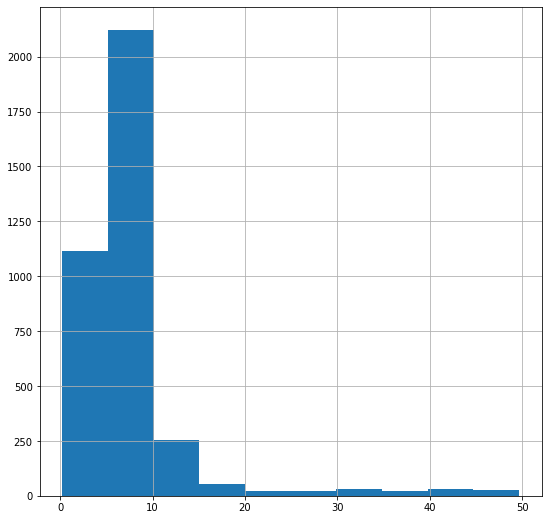

In [228]:
combined['streetview_dist'].hist(figsize=(9,9));

## Get google images

In [233]:
combined_sorted = combined.sort_values('streetview_dist')

In [241]:
combined_sorted.head()

,geometry.coordinates,properties.GRID_ADDRE,properties.FIXTURE_ST,long,lat,copyright,date,pano_id,status,view_lat,view_long,streetview_dist
1285,"[-78.473855, 38.023837]",G0025OC9000,ENCL,-78.473855,38.023837,© Google,2019-07,MBUrEPBsJ6J4pe6UmZYfKg,OK,38.023835,-78.473854,0.242131
3595,"[-78.461803, 38.024555]",G0025VC8600,COXX,-78.461803,38.024555,© Google,2019-07,uPy5ISoWonRzEJzJ3-mBHw,OK,38.024553,-78.461798,0.452950
1403,"[-78.476707, 38.056252]",G0026NK3600,OPEN,-78.476707,38.056252,© Google,2019-07,RRJMq3jUaoUwwu8h7_Nywg,OK,38.056257,-78.476706,0.560022
156,"[-78.494964, 38.023632]",G0025CB7900,ENCL,-78.494964,38.023632,© Google,2019-07,hu3D-nRt6AQ7CcmDX7j7Kg,OK,38.023637,-78.494966,0.580894
2513,"[-78.501543, 38.037868]",F2325WM8200,OPEN,-78.501543,38.037868,© Google,2015-10,5XE4xrVrV5Yu-MV8TtdI0g,OK,38.037864,-78.501537,0.695864


In [242]:
# save sorted combined csv for later
combined_sorted.to_csv('streetlight-combined-sorted.csv',index=False)

In [248]:
Lat = combined_sorted['lat'].tolist()
Long = combined_sorted['long'].tolist()
pano_id = combined_sorted['pano_id'].tolist()

In [244]:
# I want to make the Name unique, so I add the index to the pano_id to make the pano_id unique
#for index, item in enumerate(pano_id):
#    Name.append(item + "-" + str(index))

In [249]:
# API call with location, and pitch
api_url = "https://maps.googleapis.com/maps/api/streetview?size=640x400&location={},{}&pitch=20&key={}"

for lat, long, name in zip(Lat, Long, pano_id):
    url = api_url.format(lat, long, KEY)

    filename = ".\\images_firstrun\\{}.jpg".format(name)
    urllib.request.urlretrieve(url, filename)
    print ("Got %s" % (filename,))

print ("Done")

Got .\images_firstrun\MBUrEPBsJ6J4pe6UmZYfKg.jpg
Got .\images_firstrun\uPy5ISoWonRzEJzJ3-mBHw.jpg
Got .\images_firstrun\RRJMq3jUaoUwwu8h7_Nywg.jpg
Got .\images_firstrun\hu3D-nRt6AQ7CcmDX7j7Kg.jpg
Got .\images_firstrun\5XE4xrVrV5Yu-MV8TtdI0g.jpg
Got .\images_firstrun\3kpP-OxgQ4keGnEnye_shQ.jpg
Got .\images_firstrun\VdG9wMnd5yWaId6-YeH4Hw.jpg
Got .\images_firstrun\OOuKiGFStEol8ZZkaOGWtg.jpg
Got .\images_firstrun\PezLglqQFK6ZTFuhn7u6mA.jpg
Got .\images_firstrun\sxyLXQl1s1CwoeK9E9xrjw.jpg
Got .\images_firstrun\K3yilaHcFugCRI827Y3sSw.jpg
Got .\images_firstrun\1Tqcs71bQgeDlFkfOvRcHg.jpg
Got .\images_firstrun\CAoSLEFGMVFpcFBWajdMR0VYbG9BMUJvZUROSU85d2ZaN2JDdUdJQXNGWGxDUVlw.jpg
Got .\images_firstrun\ammB0uTagpyea2A9k4Hxfw.jpg
Got .\images_firstrun\D7ZsrVRjH_qR6nWWobHWhQ.jpg
Got .\images_firstrun\rNrr7j8fQHTfloILJEVhZQ.jpg
Got .\images_firstrun\TT0MWH0ri8y8147LKLr_Rw.jpg
Got .\images_firstrun\Uq84gUzlrWiVgNbRUkzqiw.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE5ZaGpSSzI0bUFEXzMyQmo3cXlWdWFCR25tVGs5U2

Got .\images_firstrun\GeOFLmhCy0GFkMROyj0aGw.jpg
Got .\images_firstrun\xPvvDqLSHmbRki6Yg2BLOQ.jpg
Got .\images_firstrun\9I2WZW_KEOaFs5Q1gnesUw.jpg
Got .\images_firstrun\dIBWuAd-g-4TkiFMjZxC8w.jpg
Got .\images_firstrun\n8-u0BmFS83J8WApjrd1EA.jpg
Got .\images_firstrun\oR0tnIrXOEtSNOCrK8-Otg.jpg
Got .\images_firstrun\r1rAsSucPKzid2o5xd8MnQ.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE5nemVuQTFZVU9IUW1namptVE5nVWZIaXpTZVdwSV9fZjZhNzVX.jpg
Got .\images_firstrun\OZPljF2NyYu1SCgYTKxHHg.jpg
Got .\images_firstrun\RCT0Kohfc_dD0HnnU96-JQ.jpg
Got .\images_firstrun\g1PiInQd_xSHysx_nAZ0CQ.jpg
Got .\images_firstrun\tfeFMp6sUkr_jYD_W5XA6A.jpg
Got .\images_firstrun\sSWZV8aTmwev9QQXQ6Of8w.jpg
Got .\images_firstrun\0w9uhV4aA5qB0qjmfFRe9Q.jpg
Got .\images_firstrun\yDLKea4ZxnwoTEZtouG98g.jpg
Got .\images_firstrun\yKfv8lddWccJE7yqB9me6g.jpg
Got .\images_firstrun\OYbXw3iH59Sz_VxJHswwYg.jpg
Got .\images_firstrun\yn2bn8mcLj_ywHLijawXFg.jpg
Got .\images_firstrun\s8_VXzGW0TuddgKxs8DD1g.jpg
Got .\images_firstrun\kwo33

Got .\images_firstrun\DV0_b3XIFoUMmmn66UmwtA.jpg
Got .\images_firstrun\62XG08XA9Ph-kgDFUr68Nw.jpg
Got .\images_firstrun\MDn2Uvz4Ov7xYYr0WEPmZg.jpg
Got .\images_firstrun\eamcISObRPSbGwpLCJl2Wg.jpg
Got .\images_firstrun\pwUioGVhYM6sEW_luBPdbA.jpg
Got .\images_firstrun\OZKZPeEQal-9W4r70OiNjg.jpg
Got .\images_firstrun\bchhF1VJmBP3yDkdrEDJ9w.jpg
Got .\images_firstrun\ERVttGLxfANKsa3K4i9Pug.jpg
Got .\images_firstrun\5Ai9_vd3fHkvHOJJVmmdUA.jpg
Got .\images_firstrun\FVZ-SwOD42-bdicGh38Mig.jpg
Got .\images_firstrun\6yV3kRVLihaXJf1a58VRoQ.jpg
Got .\images_firstrun\BFqUnmDP7Ym8xWNTfccweA.jpg
Got .\images_firstrun\yugE3niPCRgRQbyBqi157Q.jpg
Got .\images_firstrun\fd2IhlmpI52BHY5GdLv9Bw.jpg
Got .\images_firstrun\OM86F9MYnjPzNXiIk4Rt0Q.jpg
Got .\images_firstrun\hheGtPi11wFrbilIWqlYLw.jpg
Got .\images_firstrun\lklNU99S_Ksi_93hXC0mJQ.jpg
Got .\images_firstrun\bPI40uirnEv3kkTKwy86qA.jpg
Got .\images_firstrun\wPMXsvYJxDu4svz_uDWHYg.jpg
Got .\images_firstrun\glRcl7K6D_G3m1fLM9rFaw.jpg
Got .\images_firstru

Got .\images_firstrun\CAoSLEFGMVFpcE1qZVE0UkRRQ3FhVFNaSlAweUV5cnNmX2JqdmZTcDhaWGZHTEVD.jpg
Got .\images_firstrun\-gaPrk_vQzlzyyKIbgj7Ug.jpg
Got .\images_firstrun\lwzqn_5a17Ui14_kmcK3Lw.jpg
Got .\images_firstrun\RKpwSMsxa4MjHZdGhIAV6w.jpg
Got .\images_firstrun\h-busNGAHxyYrKCCbKd7XA.jpg
Got .\images_firstrun\iPDXSC6gazGjYJBVb5whhg.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE9qUUdzY3Y1SC0zOWJhV3pOZnVDVm9aYzd4eUJWSWwtQWhsUDJH.jpg
Got .\images_firstrun\YOL9rbNoM91KX_KwC2OX8w.jpg
Got .\images_firstrun\lsRYgmJY3c0GgKmxv2Cdtw.jpg
Got .\images_firstrun\E0UxsLb2TC48vJm7KyMIkQ.jpg
Got .\images_firstrun\aYxNwOJEfjSGISHJwtnvUg.jpg
Got .\images_firstrun\HvRjh1Fuhgf1aGs2G8wFlA.jpg
Got .\images_firstrun\gZ10n_yTXAG9XuSTiyC93w.jpg
Got .\images_firstrun\81Yoh0kCy7Kb_orooyUuTg.jpg
Got .\images_firstrun\H1f9ShWKoWcpShexkBOcpA.jpg
Got .\images_firstrun\_GWAoiD3Qgh9oeuvvYI4tQ.jpg
Got .\images_firstrun\LQa7pdQoclnZeRnPPmZH7Q.jpg
Got .\images_firstrun\VqEi_W05hznlH7FKz9PBxA.jpg
Got .\images_firstrun\xSjme6Zz2gX4

Got .\images_firstrun\Nw3h5m_Lbdsk8yFRwNv3ag.jpg
Got .\images_firstrun\7QjUsAYxNmjofc-xwRGzOg.jpg
Got .\images_firstrun\MKz_1ywsTleF-se8Jrr9jg.jpg
Got .\images_firstrun\a_2zXs6Nri9cWeNoRqTAew.jpg
Got .\images_firstrun\SxaYg55D6o6Wc8MF12Rx4Q.jpg
Got .\images_firstrun\t9fOm8yYEJH4fvhw4H1m0A.jpg
Got .\images_firstrun\DlmCvaoXhW4bZhYpU4H6Ww.jpg
Got .\images_firstrun\Ov1IJORnxLOTW1Uai79P6A.jpg
Got .\images_firstrun\AaM4wB8RLLyzzj5f8kZJYQ.jpg
Got .\images_firstrun\prXxN9HgEE2_ByB3-g48cg.jpg
Got .\images_firstrun\DQdwLa_02jjvxCGowDa65g.jpg
Got .\images_firstrun\S7dgoNwoiHyx3CK1hPVgtA.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE5EMDdObmswcG1JVTFKXzRaT1hSRUxwdmNIS29Fd2F3em91UTNw.jpg
Got .\images_firstrun\EvXGV2Ztjzr-TGfoU19WzQ.jpg
Got .\images_firstrun\SV4XwfAm0O7oD0OULruLPA.jpg
Got .\images_firstrun\Ane0KE_3v5Xy-3jAKDiz2w.jpg
Got .\images_firstrun\Rj743495hguG0yPBV0ePNA.jpg
Got .\images_firstrun\POnhIdUREHRpTcvLVjwNuw.jpg
Got .\images_firstrun\RPvHDyg0GCyehRbdiSEz5g.jpg
Got .\images_firstrun\JMym5

Got .\images_firstrun\an8GfOTLctyuV1J3NR41nw.jpg
Got .\images_firstrun\SPt5FZmx55pM5CwUYnsdlA.jpg
Got .\images_firstrun\aAlddGK0ZpY82hpZoHRPlA.jpg
Got .\images_firstrun\M1IrbuYLyAR-JOZiXwg-pA.jpg
Got .\images_firstrun\X_qFuDl1hHScHU9VN7L2RA.jpg
Got .\images_firstrun\kQlhEnj9WjtjWXro5lNUAw.jpg
Got .\images_firstrun\5BmIgWB50wv9_z-KmhFn1w.jpg
Got .\images_firstrun\ZnNoe04x7vvlMonbJsnfSg.jpg
Got .\images_firstrun\dC86FjF2m5iKeHkjV2Hw6g.jpg
Got .\images_firstrun\dC86FjF2m5iKeHkjV2Hw6g.jpg
Got .\images_firstrun\GdfqtXTZBRHjvEqmfml3Jg.jpg
Got .\images_firstrun\7238FW3uWuDFagvYKd9bPg.jpg
Got .\images_firstrun\rA1XydPe9KIZ3mwtnwfTJw.jpg
Got .\images_firstrun\z0QoBGAAmmQwAH7z0wYYww.jpg
Got .\images_firstrun\_lZk8l7cn5Rh9T3UWhoZ4g.jpg
Got .\images_firstrun\YqGoPNLq93Sx22E2YWY_2Q.jpg
Got .\images_firstrun\EEWOSgGB1UYTcA29q3TJaA.jpg
Got .\images_firstrun\U_lqTyyZBJPt5uJAQ2X7qA.jpg
Got .\images_firstrun\L0UrLBkVLwOlwWoFkKqXsQ.jpg
Got .\images_firstrun\L0UrLBkVLwOlwWoFkKqXsQ.jpg
Got .\images_firstru

Got .\images_firstrun\t2Ps8z730Z5wSiTePvxZhQ.jpg
Got .\images_firstrun\RANplt2uoep-ieitdsfd7w.jpg
Got .\images_firstrun\yNVnbY3g77j6QEHb8wj3ng.jpg
Got .\images_firstrun\UcErA3FYKs_Fn4JKd_Jj-A.jpg
Got .\images_firstrun\ZSIkr5ekHl-mMDjEmEzuoA.jpg
Got .\images_firstrun\i5hU2LhdjQRbmsxrvGqTdw.jpg
Got .\images_firstrun\klRNYvpAaLmDqSdfOp5MXg.jpg
Got .\images_firstrun\dCeUQDIlv43BqdkP-M49Yw.jpg
Got .\images_firstrun\CcvAWFefD-NJ-G_ryRcAlw.jpg
Got .\images_firstrun\M8vs5cFElInFrdFvk-tqiQ.jpg
Got .\images_firstrun\vg4IhRgkSxXPPZywfTaorQ.jpg
Got .\images_firstrun\SNjO0PrzHluN5aen5-3HyA.jpg
Got .\images_firstrun\GGALihw1NYexEBWE0bNqmA.jpg
Got .\images_firstrun\rzc5mQJQ2ojJsydoVdAu9Q.jpg
Got .\images_firstrun\T5m9dWX2PgwhPnxbyEMhOw.jpg
Got .\images_firstrun\4iwRmO7ZuGz2LhLtSgI5kg.jpg
Got .\images_firstrun\2phfUdsXtngJueXtqWB6LA.jpg
Got .\images_firstrun\J0oQvY5Gcj1Nwa2YPoQ9uA.jpg
Got .\images_firstrun\k2C8J1hxdfGu8BLm3EtydQ.jpg
Got .\images_firstrun\sfsf5APrCTou9H94-Xunnw.jpg
Got .\images_firstru

Got .\images_firstrun\LL9_ld4UeXodQ144F_zTmQ.jpg
Got .\images_firstrun\zRHbgVqp2I3-FI4oVzFdKg.jpg
Got .\images_firstrun\-AzEUiq5fVaHvyz1ryA2lA.jpg
Got .\images_firstrun\EZbxSkANrc_OS9vOaHFGig.jpg
Got .\images_firstrun\6SuZ_5_MxhWzxCFtJCn9Nw.jpg
Got .\images_firstrun\cHMyJqYwBIyzsIW97nNR2Q.jpg
Got .\images_firstrun\Dq0zTTmNsBq5Bzzvyi4Jhg.jpg
Got .\images_firstrun\7QP_FpY8WimghjxBmAl_fg.jpg
Got .\images_firstrun\2snVCX6Nz8rLeUkBTtxbng.jpg
Got .\images_firstrun\nYPqdn9cdKwW3V5WhyFvyw.jpg
Got .\images_firstrun\C7pdivefa19-a0JV-xUMMQ.jpg
Got .\images_firstrun\Ui0P9KKktfg-dblCw5cNsg.jpg
Got .\images_firstrun\OypAMOPIhx7Xi4d6QAyMBA.jpg
Got .\images_firstrun\95XiZgHGJZtDuKg5488aEw.jpg
Got .\images_firstrun\ZEgNAy_qv6vGE8jxaUhqmw.jpg
Got .\images_firstrun\QiyS6cYXt81DieY2IkIS3Q.jpg
Got .\images_firstrun\iBLHZxM0sIaRTrCgKqNy-Q.jpg
Got .\images_firstrun\2vE3fZxHjXAfwfBHtWwCpA.jpg
Got .\images_firstrun\k0obObqSuraNsh-ScybJ0w.jpg
Got .\images_firstrun\Fb3-OC5kWuCti23AxLxDAQ.jpg
Got .\images_firstru

Got .\images_firstrun\Uev5ZZa77GS1r9pH455Q0Q.jpg
Got .\images_firstrun\d3zA5m7OwZFkfT3lQUx38g.jpg
Got .\images_firstrun\MHkYqqRIH1fnNvTYnTdXQA.jpg
Got .\images_firstrun\oFpyh8_3ka5Hcjsrbc9GxQ.jpg
Got .\images_firstrun\N5_ZBb_fmu_yw27wyUXILw.jpg
Got .\images_firstrun\4RtFBVgvU9AfyDIOduYz2A.jpg
Got .\images_firstrun\Ri8wxQ9IUmOL70p95T1x8w.jpg
Got .\images_firstrun\Y6lHeq7a4gXroMSWUajKwA.jpg
Got .\images_firstrun\wSO2FjVADhFCIegYofF_Qg.jpg
Got .\images_firstrun\AVmWNt2V9NekbTnnFRPBVg.jpg
Got .\images_firstrun\-d_3BRobGkMTErcH6MBW_w.jpg
Got .\images_firstrun\PIti6ec6Tc5_3BXEQwuiAg.jpg
Got .\images_firstrun\YIM6ia-fiN2kExUg_TWUNw.jpg
Got .\images_firstrun\s_VUV9zDcqTT2m82_FPNPA.jpg
Got .\images_firstrun\s_VUV9zDcqTT2m82_FPNPA.jpg
Got .\images_firstrun\tST6n2ZQ8KooZxjw8ZArEw.jpg
Got .\images_firstrun\zS5iavHA3HPWzFsgukjcig.jpg
Got .\images_firstrun\hiaa6qfXtnPptSifKQuTFw.jpg
Got .\images_firstrun\Fp_CHVTwwGNWzWIIt1HWCQ.jpg
Got .\images_firstrun\iiz91NM1h_BSXMFbPT6PVg.jpg
Got .\images_firstru

Got .\images_firstrun\85-e4FGCeqC7xyqo62Ipxw.jpg
Got .\images_firstrun\85-e4FGCeqC7xyqo62Ipxw.jpg
Got .\images_firstrun\cnWs38jIUzYNwLEJX3Nxww.jpg
Got .\images_firstrun\ZcOnF0SDSzUeXtiIuaAuTQ.jpg
Got .\images_firstrun\4RDnUZWyfJxinwrt76JGgA.jpg
Got .\images_firstrun\ZMeFxaLVAJ-K8dOpCHh3aw.jpg
Got .\images_firstrun\ZMeFxaLVAJ-K8dOpCHh3aw.jpg
Got .\images_firstrun\f-4UTjRFV4w4L_ztMkZdNQ.jpg
Got .\images_firstrun\Vc_tyq3QrchDnNFy_moNow.jpg
Got .\images_firstrun\sLDzRKg6HXsKOFLV2ZI-Rw.jpg
Got .\images_firstrun\4CJ1BgHXOKZopmnnqoBeAA.jpg
Got .\images_firstrun\-Mw_bMOG3ZSOj5l-4gNTow.jpg
Got .\images_firstrun\cKCaw-5HnIFM8efHpQnNHw.jpg
Got .\images_firstrun\p-4OnpQzN_qbO66iauNE9g.jpg
Got .\images_firstrun\p-4OnpQzN_qbO66iauNE9g.jpg
Got .\images_firstrun\Mdkn35FMWJ7BvvWgWiRlhQ.jpg
Got .\images_firstrun\LNEiSu29CmhDV3zfNg0KVA.jpg
Got .\images_firstrun\tSFTjEztjJTn1ntRt2GExg.jpg
Got .\images_firstrun\3ar2QRu5w61XANpZaSkbfg.jpg
Got .\images_firstrun\Tn7k0kTyyCMbsKNR2WtdJw.jpg
Got .\images_firstru

Got .\images_firstrun\vsFgCCz9yslYppih1ANBZg.jpg
Got .\images_firstrun\4P_fOMt9S7UJDzYg7DlmLg.jpg
Got .\images_firstrun\4P_fOMt9S7UJDzYg7DlmLg.jpg
Got .\images_firstrun\fo5YlOzpH25gIOB5TFVD6w.jpg
Got .\images_firstrun\S2bJpBYkNxo844M4dCUZzg.jpg
Got .\images_firstrun\hWiQuLVQagGcwbKzpsGkXA.jpg
Got .\images_firstrun\p14Cc1j_ZhEC1bFYkMYt1g.jpg
Got .\images_firstrun\vdsYoOzen2evwUwOGrWwNw.jpg
Got .\images_firstrun\noCbHsXbQVCJTXo1ghWB-A.jpg
Got .\images_firstrun\7LPAXumznvthaPW0iim0QQ.jpg
Got .\images_firstrun\9ffKJjhyRnbN_kHDiHci3Q.jpg
Got .\images_firstrun\0uVGlKq7svqnb-vStGXbFg.jpg
Got .\images_firstrun\HOq6kZb557g7N18ZugcWhQ.jpg
Got .\images_firstrun\Veuhfd4S2XPRcCPqrQaMDA.jpg
Got .\images_firstrun\1Ztxw_tyiuDI4iTkMmLtrw.jpg
Got .\images_firstrun\K0qQkM_pwOOCAri5b91WOA.jpg
Got .\images_firstrun\GBkM3edBjXK8fnRewCl-Tw.jpg
Got .\images_firstrun\GBkM3edBjXK8fnRewCl-Tw.jpg
Got .\images_firstrun\cooP2ArOevKRE5nNsyL6ig.jpg
Got .\images_firstrun\zGqkWNHv3ySApIP3hkoN9Q.jpg
Got .\images_firstru

Got .\images_firstrun\DrlsfOFa7aq1MCpl57ek8w.jpg
Got .\images_firstrun\6Tz1JEK3_ymrL5AebYzqNA.jpg
Got .\images_firstrun\fB9IOuBsemeO95qyL9gX4w.jpg
Got .\images_firstrun\rfRHyyNfaJlCrFVa0hcObg.jpg
Got .\images_firstrun\R5QQhSQt7jQzA9mk6iEHbg.jpg
Got .\images_firstrun\d-S2WjF3fQkP603v5OHRZA.jpg
Got .\images_firstrun\M32XUbkXpOKHodu_6w_IbQ.jpg
Got .\images_firstrun\kKPL4TfigdXxcz0jrbl2Zw.jpg
Got .\images_firstrun\JwPrJWJNA-N1p2aIp5-BOA.jpg
Got .\images_firstrun\S32p0hLEBN3isgW9IRJtMA.jpg
Got .\images_firstrun\oVYP2mXNgCmpSnJJEcOqnA.jpg
Got .\images_firstrun\K0d5qphFbMCF-UoPDZC7SA.jpg
Got .\images_firstrun\lgp3FP5ScjW_VYIM0aZ4BQ.jpg
Got .\images_firstrun\gieqVIRpE3Cl3x-DnrV2RA.jpg
Got .\images_firstrun\CM_0m5D44IXENRNudo1dCw.jpg
Got .\images_firstrun\_4bPPedlLKKNkn202dI0eg.jpg
Got .\images_firstrun\029WK11nqqEFYM1xJ9kBkQ.jpg
Got .\images_firstrun\_IsZoGunQgxKhCw9AzFVTA.jpg
Got .\images_firstrun\KU9vzkVzZG7PopSHGS8GMw.jpg
Got .\images_firstrun\ZXLPrKaMjgmBQhAzjatBtA.jpg
Got .\images_firstru

Got .\images_firstrun\oE3aD-ECPIwQZQTAHYlpsA.jpg
Got .\images_firstrun\UjJM73XbBxGb-2TYIa3CGA.jpg
Got .\images_firstrun\sfwfhDKlHldxXZS71qgWbg.jpg
Got .\images_firstrun\N6BUJoSj7JX7xBEupnaNEQ.jpg
Got .\images_firstrun\FpxOsYmBAfWSguK8iKwAVA.jpg
Got .\images_firstrun\CfqQ1FmOw0jTgU3Y2ajD3Q.jpg
Got .\images_firstrun\suNlHfEQrpE2c_NG_Nf07w.jpg
Got .\images_firstrun\XN4nxW3ikseUUlDnLEhn8A.jpg
Got .\images_firstrun\OXxqS2BI0VROrJNCK8p2tQ.jpg
Got .\images_firstrun\IcGVDg5MRvBpJZybB4vRvA.jpg
Got .\images_firstrun\WhxxVjRUxm8Pq4SxRRherA.jpg
Got .\images_firstrun\2pR_gMF2rUCxsPqbpyYEXQ.jpg
Got .\images_firstrun\MTVac-BrJMI3lf-3GrBrdA.jpg
Got .\images_firstrun\Ret30T1cuHcatT8hK2B8yw.jpg
Got .\images_firstrun\Ft75Q8oXdztbToLWUAPiPQ.jpg
Got .\images_firstrun\Ft75Q8oXdztbToLWUAPiPQ.jpg
Got .\images_firstrun\onVT87z1HCu1fjyKW7eS5A.jpg
Got .\images_firstrun\1zX-eSFuGb4b9NtV6ttk1A.jpg
Got .\images_firstrun\nRz8uYMRFyAuT3SXE1F3qg.jpg
Got .\images_firstrun\LrXnA8LCCK3Whi9dlinlTw.jpg
Got .\images_firstru

Got .\images_firstrun\iYYaj8k0AWMevWx8X98nBQ.jpg
Got .\images_firstrun\lEYLp6bJbaHpZAfqUb8NvQ.jpg
Got .\images_firstrun\QhxTKAe9OEf9R2faX1wnBw.jpg
Got .\images_firstrun\dPfpJDrbRw6Z-4BtJZCdng.jpg
Got .\images_firstrun\8u15YfEpoX_YCX4p0PQCww.jpg
Got .\images_firstrun\OosXmDHDghX6oOyF31-JLQ.jpg
Got .\images_firstrun\j1QHY_CpS6TmaR-Ovad_GQ.jpg
Got .\images_firstrun\sSFn3JPy7xI8ieJeKT47GQ.jpg
Got .\images_firstrun\Vj5DjkEI-sX1elSurfFowA.jpg
Got .\images_firstrun\tC_CMMuzEF-ewQGBHuNBcA.jpg
Got .\images_firstrun\Ul6jbqZzcjXLkG5kT2R6WQ.jpg
Got .\images_firstrun\6LMDf2liP3XZLFkC4F8z7Q.jpg
Got .\images_firstrun\YxzUphcZnkMSPo0MnwP6GQ.jpg
Got .\images_firstrun\QBayszPM_L-icfvRKgcEig.jpg
Got .\images_firstrun\vtMT1aQ3k_4LkcgJFuvkcQ.jpg
Got .\images_firstrun\0W7iOSSBmIR53HXgdLmYmQ.jpg
Got .\images_firstrun\ODq-9k7S53Wq9eSJD-LNFA.jpg
Got .\images_firstrun\cIkEkpiebOuRtwmAasn95w.jpg
Got .\images_firstrun\1UF060WcSwOCK7Zeg-0X8A.jpg
Got .\images_firstrun\n6mRYOKTKJtPna1X7zcFtg.jpg
Got .\images_firstru

Got .\images_firstrun\meDCuKlmx-M_kBZheSLhYQ.jpg
Got .\images_firstrun\q-qdgX8jteO94XGhslJG5A.jpg
Got .\images_firstrun\vSRMmFJ0eKqT3tnFGNLkIQ.jpg
Got .\images_firstrun\Yk-XzwhB1x3SFJV4EBvm4Q.jpg
Got .\images_firstrun\AD1qHgT6n1dmVAJU8TX1QQ.jpg
Got .\images_firstrun\jhqAaCuD1HyeuzccrR3CYA.jpg
Got .\images_firstrun\YjnVK-yMolVieLu_gmmobQ.jpg
Got .\images_firstrun\-dyBEx5BS2dFf0ct2DVkYg.jpg
Got .\images_firstrun\oL8kRbIsjYkQUErb9KSUgg.jpg
Got .\images_firstrun\Erro4G7TkZSw993xFgB37w.jpg
Got .\images_firstrun\R1yWP8SX6h8YJAGEISZX7g.jpg
Got .\images_firstrun\jviE-unKSZUzI1DWBZVyjw.jpg
Got .\images_firstrun\jviE-unKSZUzI1DWBZVyjw.jpg
Got .\images_firstrun\Rarv3PSBlSITcz6xM59Zow.jpg
Got .\images_firstrun\ms2sjhkfRJ3acnB4NTDKzg.jpg
Got .\images_firstrun\9yfPQd1-o2YrLcMq3MYIHg.jpg
Got .\images_firstrun\kXARxgErR7NiXMqEeqfWKQ.jpg
Got .\images_firstrun\fvFbAZIoairoJXpgqHYylQ.jpg
Got .\images_firstrun\Xv-fjMtHpOMzYtGywR2Zdg.jpg
Got .\images_firstrun\pRPrUnWe3sUGQ1zPrLYkMA.jpg
Got .\images_firstru

Got .\images_firstrun\3o1AkIa7SXUZ1MSD9wv6kA.jpg
Got .\images_firstrun\HUB9YhGVpIxQQMOws7n_ZA.jpg
Got .\images_firstrun\64AIYF6hJRrTGrV1YOm8-w.jpg
Got .\images_firstrun\CjHPR-F6iXOKvghlDxvm5w.jpg
Got .\images_firstrun\ji3DCCOCJIQyHRuVm7z9GA.jpg
Got .\images_firstrun\HZDbdxDTpqz9eveA8LrTpA.jpg
Got .\images_firstrun\oY3nWxtYvTfhFa3Oku_-Yw.jpg
Got .\images_firstrun\J1Y7S2siyBU8i2QShtPSog.jpg
Got .\images_firstrun\w5QWSG-WUg7iEN7ppLS53w.jpg
Got .\images_firstrun\wJFcwgec1l5IdxE4awb-VA.jpg
Got .\images_firstrun\UkbcZBmSYsmPoYn8pEt7AA.jpg
Got .\images_firstrun\UbMFkncCdKHAqgKVG0A2JQ.jpg
Got .\images_firstrun\rC-Jb70agkMoJ6xu3Qh3TA.jpg
Got .\images_firstrun\Ng1EmXaUdemcOkunrmwqvw.jpg
Got .\images_firstrun\l2kS0_IyPCC6jRS8-kqccg.jpg
Got .\images_firstrun\2lInwtpyXgHSPSWav3rNOQ.jpg
Got .\images_firstrun\FgTuXuHIGsE9RwwvbVKf5w.jpg
Got .\images_firstrun\k5QXYFi1MDOfXdw_0XV-SQ.jpg
Got .\images_firstrun\gmyfO7sTeJCq9PBbuxgPiw.jpg
Got .\images_firstrun\OJMvp1n-AaMNKd1MtYNcOA.jpg
Got .\images_firstru

Got .\images_firstrun\jpnceWcGxL5cMy4pakvOgw.jpg
Got .\images_firstrun\J8QWDspJuI9Hi40Wt_1RWQ.jpg
Got .\images_firstrun\PdXvXFXRCvB1-cVzKjtiwQ.jpg
Got .\images_firstrun\K5RUpbDEFDR2pL8PsW3zwQ.jpg
Got .\images_firstrun\XeSKFfN42aUOtu7l8ERPMw.jpg
Got .\images_firstrun\HTLk2Sws6frmpqV1JmjREQ.jpg
Got .\images_firstrun\dpwv-_X8mpsCLAvHbUuq2w.jpg
Got .\images_firstrun\Cezou2rzW4vmE51dmd_NZQ.jpg
Got .\images_firstrun\EQniTo_LCRqr6DTg3B1bbQ.jpg
Got .\images_firstrun\5BkmbJqEpI64n8JUvSukgA.jpg
Got .\images_firstrun\MkKNRPTlbO__J1ptGkOAcg.jpg
Got .\images_firstrun\HIL9ZqUGRUr1Kbzp-v7Wag.jpg
Got .\images_firstrun\gsH_WQuZ05Yc0RYJZi5uyQ.jpg
Got .\images_firstrun\-QpAZcHWqFO531hDUiDx5Q.jpg
Got .\images_firstrun\-WouRoGhf0wm7bhQTChJ5A.jpg
Got .\images_firstrun\ZL4jBg-J75xvDCM8CLwUYQ.jpg
Got .\images_firstrun\DTTa_eWBaDUdw24aE8mcQg.jpg
Got .\images_firstrun\QGyuTMtZ6zkunMelTXeS0g.jpg
Got .\images_firstrun\Trdqs6J037JP9vCBbXpgiA.jpg
Got .\images_firstrun\KUL5XT9kF5fm0OH3faEx5g.jpg
Got .\images_firstru

Got .\images_firstrun\b3HYcJZMkrIWOz-EHtZ5nQ.jpg
Got .\images_firstrun\dgTzCSUPe1RlsoAslBKkiA.jpg
Got .\images_firstrun\7RGhs7SR8SV3oGtZzMkJAA.jpg
Got .\images_firstrun\uBDNBfwdu8tIHxHMGklMjA.jpg
Got .\images_firstrun\JHucwb-koo6XYw8O83HMxA.jpg
Got .\images_firstrun\KPf-iZWaDE3x5N22HkJlVQ.jpg
Got .\images_firstrun\zOp2NItT_h3nu3WHr7NLow.jpg
Got .\images_firstrun\BrAYHV8xEM5AEERbt7fVoQ.jpg
Got .\images_firstrun\slSnXbA9c5aQPu1aypvkYA.jpg
Got .\images_firstrun\GtvN2X22ZR3GfWdGzMDcrw.jpg
Got .\images_firstrun\guhJTeQNemF-eyq1ZFG1Zw.jpg
Got .\images_firstrun\M8W_S29i04E2gRxAjYRPpg.jpg
Got .\images_firstrun\bC6URldLgPB8rB8VZuKIEg.jpg
Got .\images_firstrun\6RnmYLN7J5B1HtqmpzTZMw.jpg
Got .\images_firstrun\URIXh6wGbbvWU6Mm4mAi0Q.jpg
Got .\images_firstrun\HvBZLooIxE9_c5LJZy2k3g.jpg
Got .\images_firstrun\4O4zCYI44vgUyYXmij36nA.jpg
Got .\images_firstrun\Q-Xf4Pq_0y6bNXTejabm6Q.jpg
Got .\images_firstrun\G9Wc4C51PteNKPAYOSEMrw.jpg
Got .\images_firstrun\i1zXGFwnLplLNeBEb9yWcw.jpg
Got .\images_firstru

Got .\images_firstrun\s8CYpeBXIZghqTQNzirDhA.jpg
Got .\images_firstrun\n8lt71nFVeoFV5gVUQAU6A.jpg
Got .\images_firstrun\NM_2OA7Qqd3yeWaXlprtQA.jpg
Got .\images_firstrun\Lqk2uP-EA7uRjV6MRXMazA.jpg
Got .\images_firstrun\xLqbdwdvL_9aNwm3bM1mqg.jpg
Got .\images_firstrun\1k6AjDRZ00WIMDM2HXJN9w.jpg
Got .\images_firstrun\zjaIqM35RIsGHa-7VknKTw.jpg
Got .\images_firstrun\vlOSqOifYweRGc7F5LPnpw.jpg
Got .\images_firstrun\kLl04Cf33gHNwGqKG_NDAA.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE03ZXlTWFF6dHd6OXp1a29CS0dQS0h4aFFZZ2MtM1VfSlVuT190.jpg
Got .\images_firstrun\4cvwXRvGoj_vzbOseU2YEA.jpg
Got .\images_firstrun\6nZZgbqofXlzN5tRsZajzw.jpg
Got .\images_firstrun\rjQeuKotZMQKFonsY6D3aw.jpg
Got .\images_firstrun\p2njtIvAbXSlZV83CEj63g.jpg
Got .\images_firstrun\u-E2pCJQruonPkWbbbDxBQ.jpg
Got .\images_firstrun\Rp9wEa9d_ufU3daW-3LO2A.jpg
Got .\images_firstrun\ZFGloKXZOwyYPgXF0FQK0g.jpg
Got .\images_firstrun\vQcs7zRi5BMrt1kEr8rsQw.jpg
Got .\images_firstrun\yXVTx53UUL8Xs6WiOuamRQ.jpg
Got .\images_firstrun\cq1_C

Got .\images_firstrun\V_4Kh_A7p4nMzljLa5G0RA.jpg
Got .\images_firstrun\SCNKjVIiv4l_BAAk48yueg.jpg
Got .\images_firstrun\fUwHAptzCsPM6yeS7q7Xwg.jpg
Got .\images_firstrun\4glCIfKPAtL3BoFhEOIX3w.jpg
Got .\images_firstrun\6BVxUDqz9knGLB6guCJ_NQ.jpg
Got .\images_firstrun\t1uk2urNjiiouimIiHs9Iw.jpg
Got .\images_firstrun\lNAd-6CK3nrGdMY9Bp3gew.jpg
Got .\images_firstrun\kjSFNguxwxxAuEi-9bmqqA.jpg
Got .\images_firstrun\VyRfN79jlMk0Kv08SzQBOw.jpg
Got .\images_firstrun\8_evRLvIbtzui1YCAnAbrw.jpg
Got .\images_firstrun\oxY5tiNI7DE6t_TLF05r1g.jpg
Got .\images_firstrun\kdKEz0uZWqeVNDxA-ZMlaw.jpg
Got .\images_firstrun\byYHTgamegRVLxygiydqoA.jpg
Got .\images_firstrun\2dD5hqh6VmkKtCbOvpnfew.jpg
Got .\images_firstrun\pufzftClV-1XYcAQEsNh6g.jpg
Got .\images_firstrun\bE8BL76vtX7MJah1LKluvQ.jpg
Got .\images_firstrun\XWMJSWBNBMepL3Zz-D6udg.jpg
Got .\images_firstrun\ipNxtTWd3Er2o-XBb41TNQ.jpg
Got .\images_firstrun\aE3TjCcurtsoZ38BoW-8VA.jpg
Got .\images_firstrun\3JtDJW7k2DRcsbd7vBwG2w.jpg
Got .\images_firstru

Got .\images_firstrun\zrysNE4g-HowjoqltOtwOw.jpg
Got .\images_firstrun\GoGDoN3E2cab_7wFxza24w.jpg
Got .\images_firstrun\o_z27lbKhmEHHsTmC3EZrw.jpg
Got .\images_firstrun\OosXmDHDghX6oOyF31-JLQ.jpg
Got .\images_firstrun\UISJhBtdSGeJ5SGD2joTfw.jpg
Got .\images_firstrun\SaeQY3sqD5x_DL78roy8vw.jpg
Got .\images_firstrun\sFhqlNQX7PxeNhFzCBQTQg.jpg
Got .\images_firstrun\nZIhTRIm7xtotuO39LzoLA.jpg
Got .\images_firstrun\gnUoKorrpmo0QUP__j0Qtg.jpg
Got .\images_firstrun\CTQMdMhURUEeJEyYk0LjOQ.jpg
Got .\images_firstrun\lIkk2WiLy4nGx6VSv1IWCQ.jpg
Got .\images_firstrun\c1Tj2WaUcBTuRUyGcQH9yQ.jpg
Got .\images_firstrun\FAfyD4NZT5UCkZOJdLfe1A.jpg
Got .\images_firstrun\ZCB-gs_2ThTWWzTpEG5XGQ.jpg
Got .\images_firstrun\4lkFB4_OaNqXH2v1bdxqAw.jpg
Got .\images_firstrun\7RsbGKdt9cMbrCYP2dHIsg.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE5CaUVrT3ZFVU1BbmoyaDBTS1dNSEJGcUtaT29ITTB6WWR2bW40.jpg
Got .\images_firstrun\ZZXfMzp1O83ckX2LZWJZBQ.jpg
Got .\images_firstrun\zPtwTI4aX3r-vyMpoz6TqA.jpg
Got .\images_firstrun\UIZ0I

Got .\images_firstrun\6ccxBsDotUfsCMdePKPCtg.jpg
Got .\images_firstrun\hHsq2CjWW1Nyx0fZ_9OzzA.jpg
Got .\images_firstrun\HYyQ1ARBjIBpSSJq-jodsQ.jpg
Got .\images_firstrun\b4H0X4QRUSedvcHpon7f6w.jpg
Got .\images_firstrun\N04Ea1Y3sUyiwzCeC1aLqQ.jpg
Got .\images_firstrun\CAoSLEFGMVFpcFBTdmhXT3JLcS1OZ0tJd1BnN3MtcUNybFFsZ3RYX1p4VHlfZ3pT.jpg
Got .\images_firstrun\nrju2c02EFZOzJ240_2Uqw.jpg
Got .\images_firstrun\HwZtW_cfmI71ZkjgHoCvXA.jpg
Got .\images_firstrun\thdDfdwBrEr6E9NTY036gw.jpg
Got .\images_firstrun\zbwoadc2y_ydl3rbr0oYcQ.jpg
Got .\images_firstrun\hVPsXXxZdfru0GGYZO-EbA.jpg
Got .\images_firstrun\abFqteRRx0qO27xuuA8psA.jpg
Got .\images_firstrun\5r2xCvj61XT5E_TUpET3Tw.jpg
Got .\images_firstrun\v2j_kKskQLuNgE481eChrg.jpg
Got .\images_firstrun\WPxx4BhG-GGUrzuEiC0nqw.jpg
Got .\images_firstrun\3AHp-TFcnV0OeROZ4t27RA.jpg
Got .\images_firstrun\40M4QX0XLeyzrIVF3mTj_g.jpg
Got .\images_firstrun\CAoSLEFGMVFpcFBIb1hoMHljWGNzdGZVQWVHWlYxVkhmQWlZZ3RBMUdXcU9KYXR1.jpg
Got .\images_firstrun\F4hbPPnkZ2zl

Got .\images_firstrun\Knj1Gbt2NM5GMqQoxXPGkg.jpg
Got .\images_firstrun\puIcLC3Ygz9sYIXc13-ViA.jpg
Got .\images_firstrun\puIcLC3Ygz9sYIXc13-ViA.jpg
Got .\images_firstrun\dHOWp0U27ybVY0w6CFUvYg.jpg
Got .\images_firstrun\Ku_f0O737KQDxCsmcXZxYA.jpg
Got .\images_firstrun\Ku_f0O737KQDxCsmcXZxYA.jpg
Got .\images_firstrun\zbVC9xk9lJO061kDnDd26w.jpg
Got .\images_firstrun\_-YdMd68vh6LTMvOTriD6A.jpg
Got .\images_firstrun\hukphlhm1u0UoCkKqkfxJw.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE1GWmpac29fQjdWRGMxRkVHTHc2WVRZRnRVa1EzT3JMRkd1UmxG.jpg
Got .\images_firstrun\OaLF8DMY_fprfYGu16MOEw.jpg
Got .\images_firstrun\qrKmkP-2PMXXECdEwh4HNQ.jpg
Got .\images_firstrun\u1QWIFf_zIXEc3LarZz-ig.jpg
Got .\images_firstrun\-i_0ZPXTqEoaDqM-oSHY2w.jpg
Got .\images_firstrun\-i_0ZPXTqEoaDqM-oSHY2w.jpg
Got .\images_firstrun\vWZgitBXyZwkeRMUOjU0pg.jpg
Got .\images_firstrun\nrju2c02EFZOzJ240_2Uqw.jpg
Got .\images_firstrun\nrju2c02EFZOzJ240_2Uqw.jpg
Got .\images_firstrun\CAoSLEFGMVFpcE5BSnFYMWZsNmJ0RnFCNW0xZFV1SldQdUQ5VVI0Nk

## Checking out the first run

In [255]:
firstrun = pd.read_csv('streetlight-combined-sorted-checked.csv', header=0)

In [256]:
firstrun.light_shown.count()

816

In [261]:
firstrun.loc[firstrun['light_shown'] == 1, 'properties.FIXTURE_ST'].value_counts()

ENCL    632
ENFL     85
COLN     33
COXX     12
OPEN     12
CTMP      2
DIR       2
AOBA      1
CLSU      1
ULFL      1
Name: properties.FIXTURE_ST, dtype: int64

In [262]:
combined['properties.FIXTURE_ST'].value_counts()

ENCL    2859
ENFL     409
COLN     201
OPEN      77
COXX      68
CTMP      28
RECT      28
DIR       19
ULFL       6
URB        3
CLSU       2
TRAD       2
COBR       2
AOBA       1
Name: properties.FIXTURE_ST, dtype: int64

In [265]:
combined[combined['pano_id'] == 'IDXa6Kvkt3kVo40EhS6I7A']

,geometry.coordinates,properties.GRID_ADDRE,properties.FIXTURE_ST,long,lat,copyright,date,pano_id,status,view_lat,view_long,streetview_dist
2243,"[-78.484899, 38.03419]",G0025IJ5600,ENCL,-78.484899,38.03419,© Google,2018-06,IDXa6Kvkt3kVo40EhS6I7A,OK,38.034263,-78.484846,9.317025
